In [3]:
from pathlib import Path

import numpy as np
from sklearn.metrics import auc

DIR = Path("/data1/xp/code/specEmbedding/ROC")
SAVE_DIR = Path("./roc")
SAVE_DIR.mkdir(exist_ok=True, parents=True)

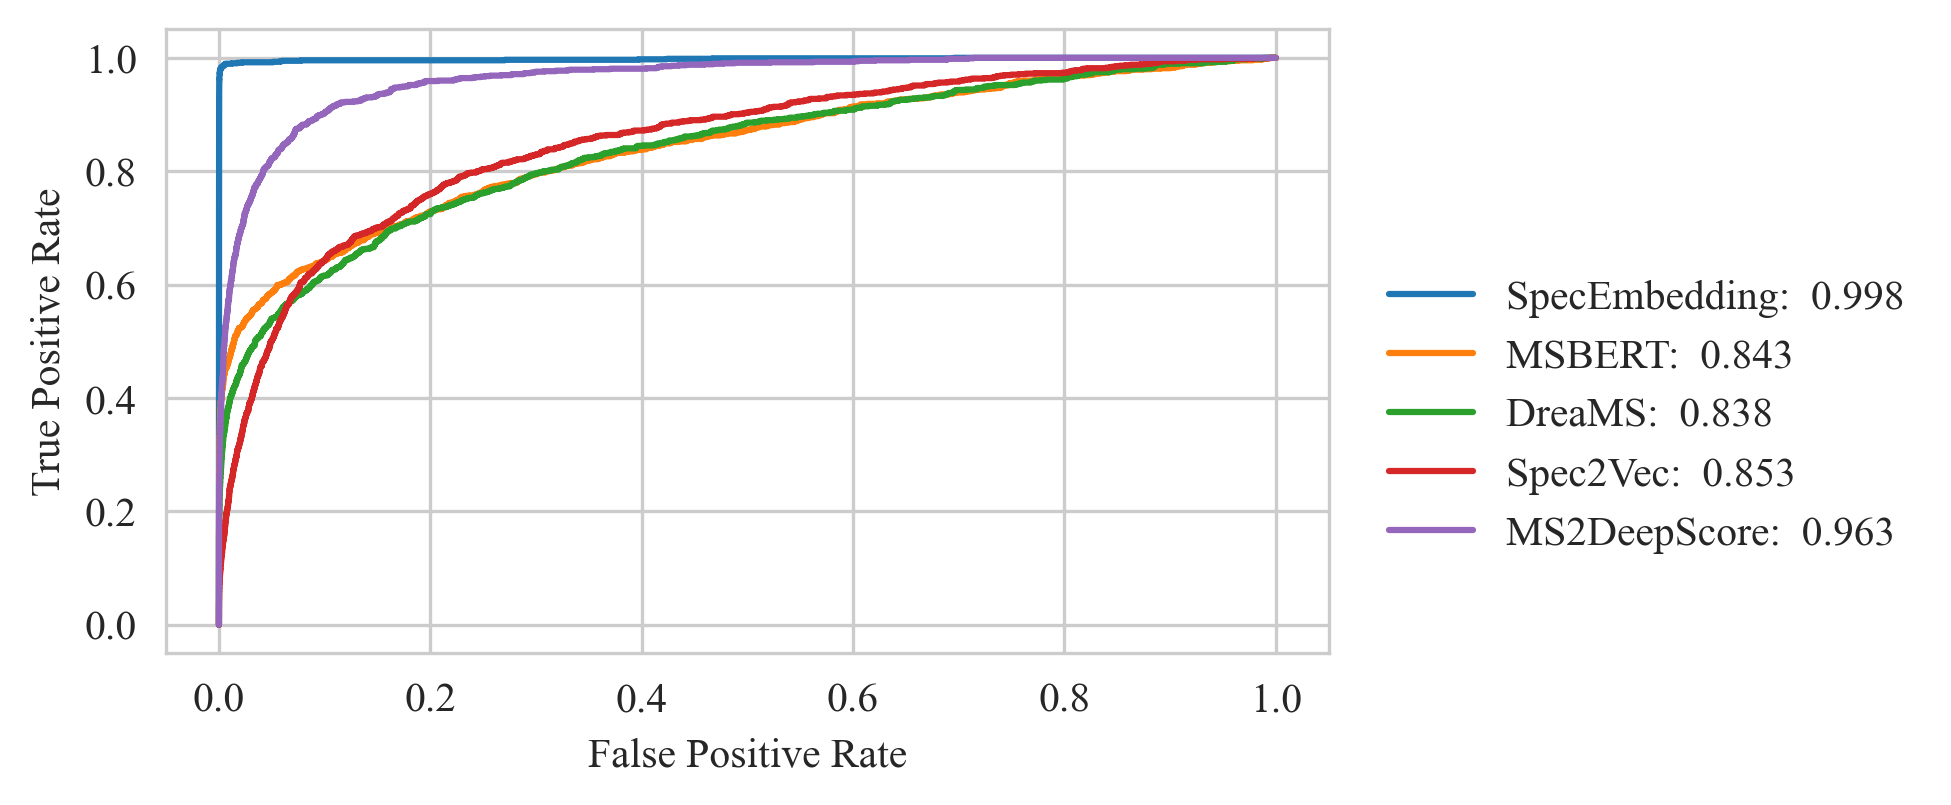

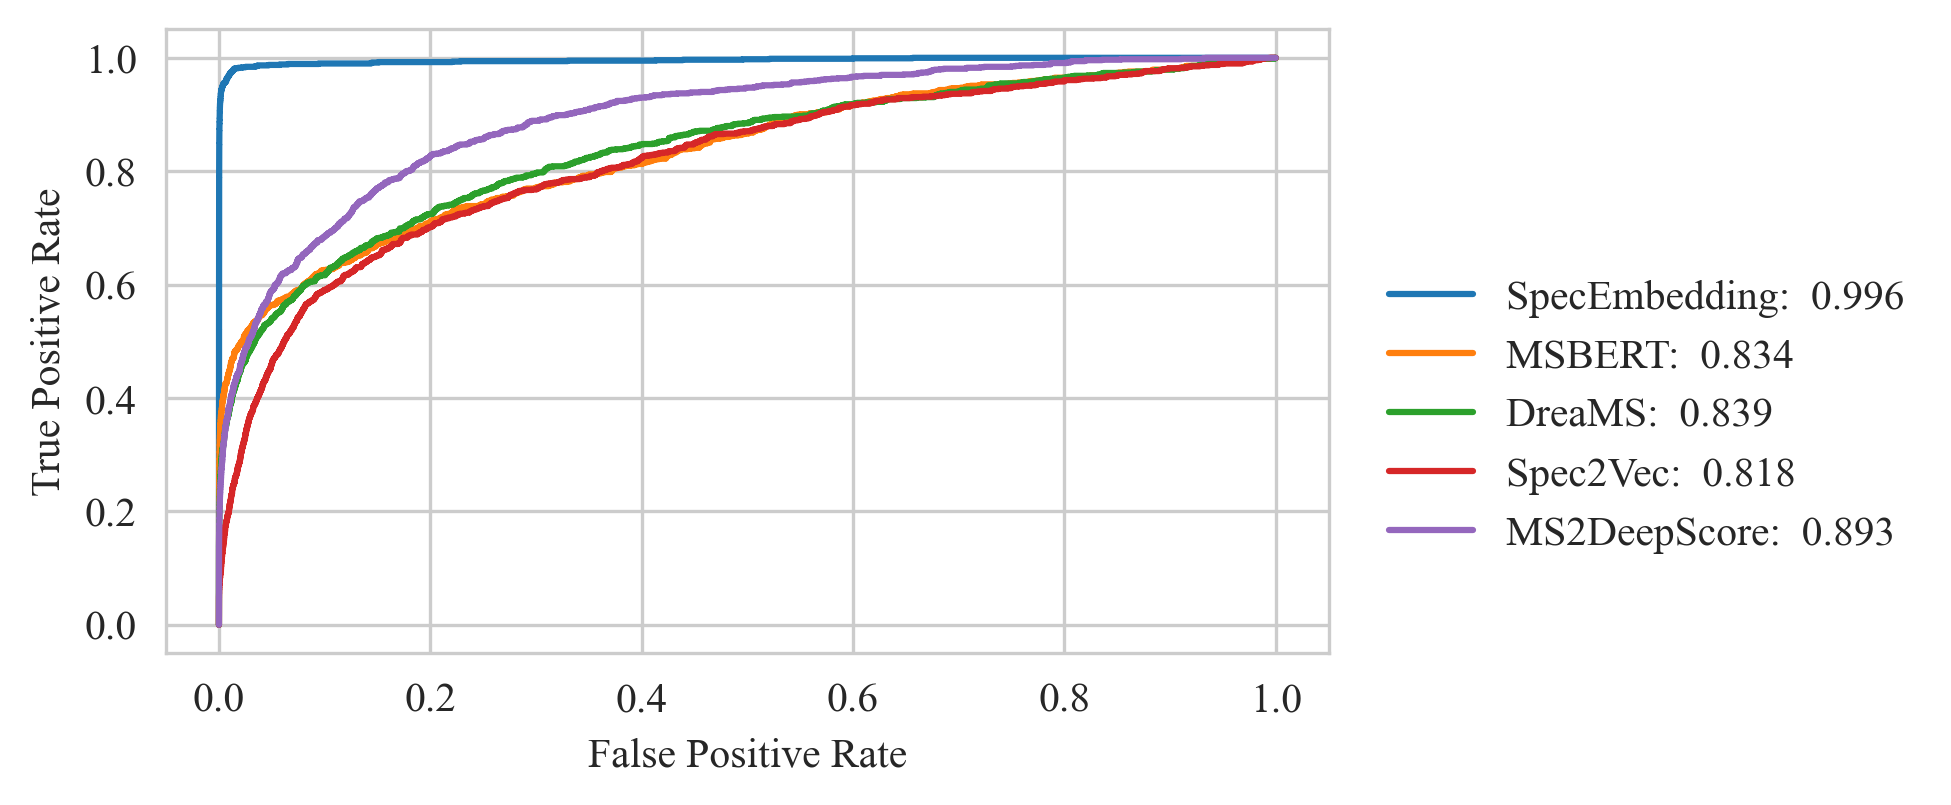

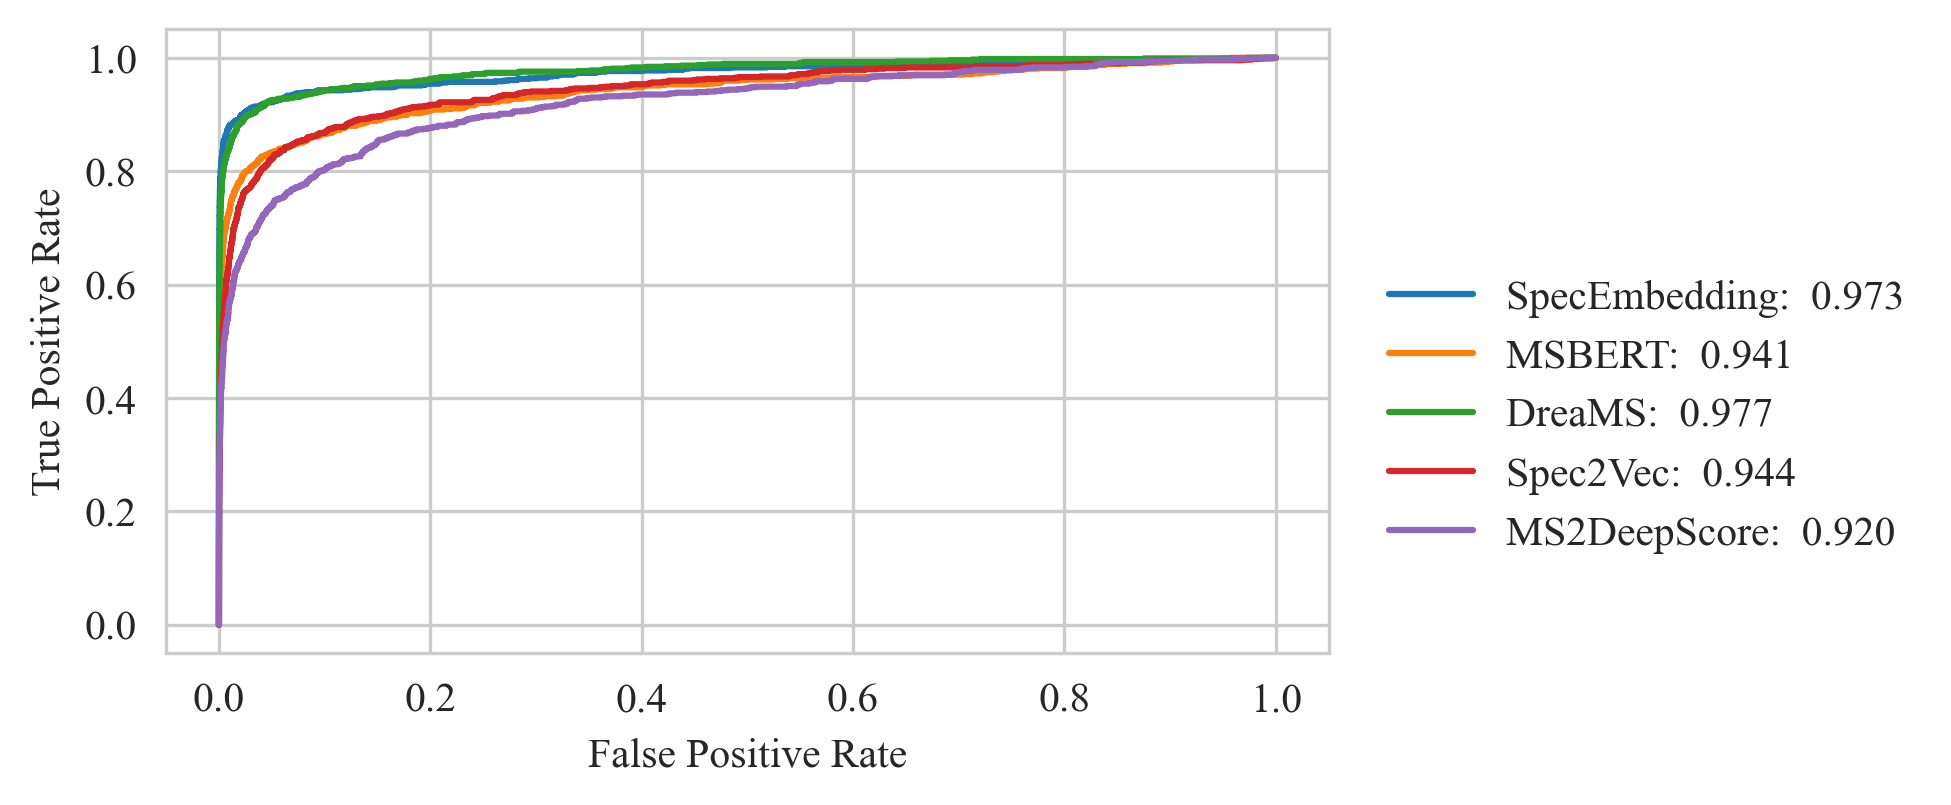

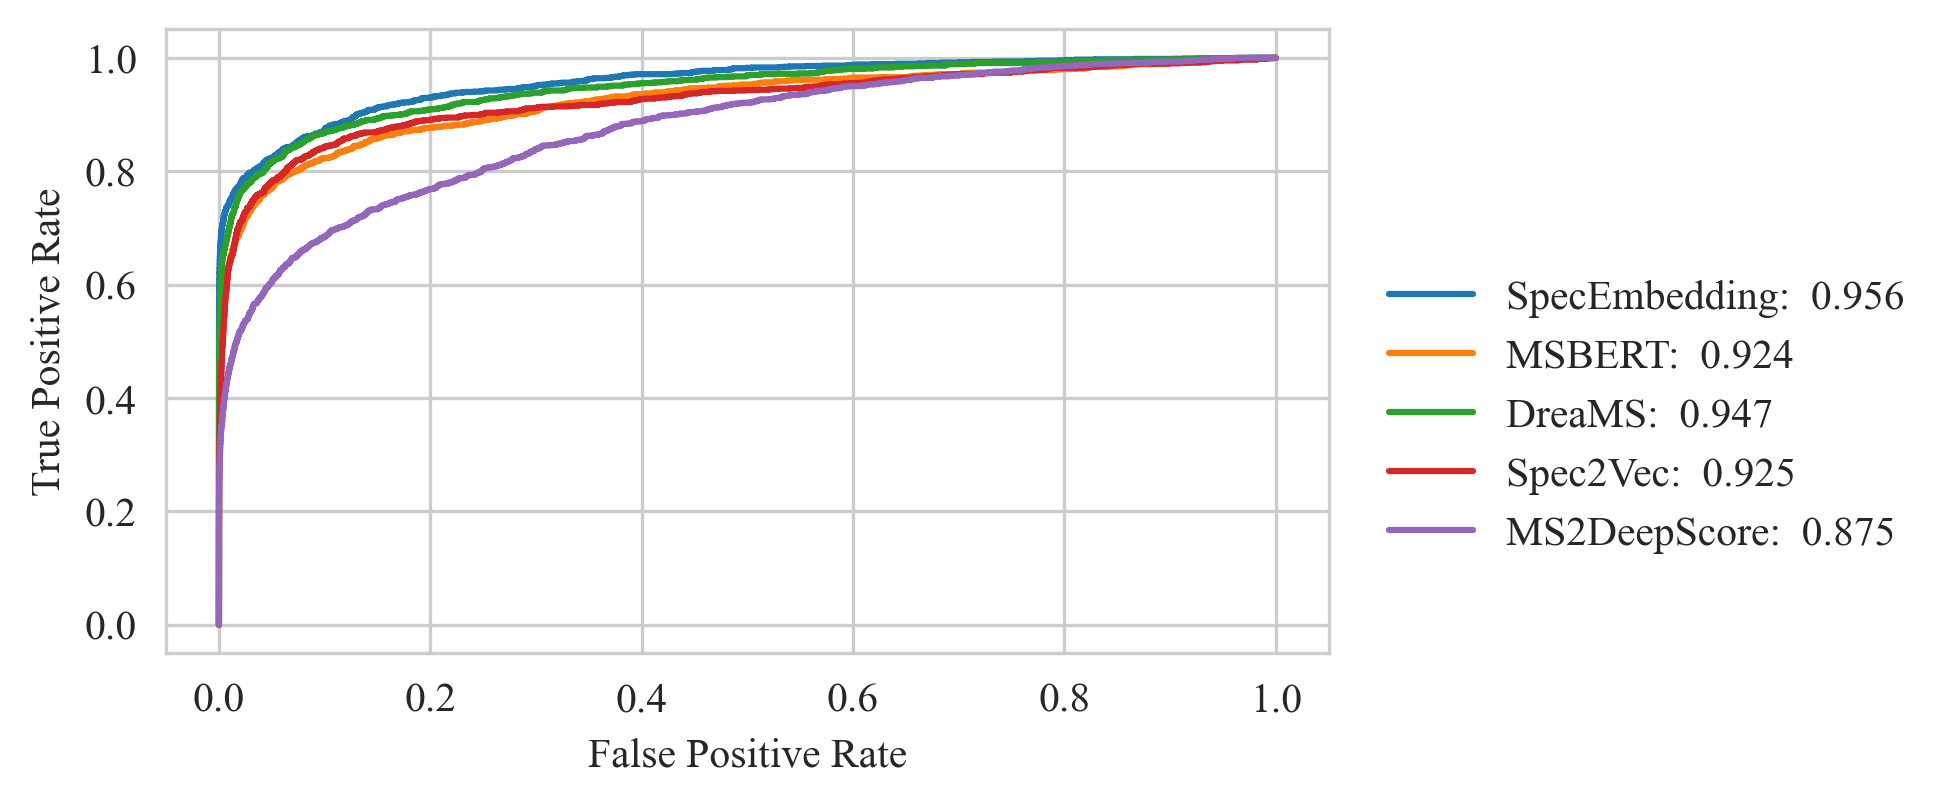

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set_style("whitegrid")
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

methods = ["SpecEmbedding", "MSBERT", "DreaMS", "Spec2Vec", "MS2DeepScore"]
child_dirs = ["gnps-orbitrap-train", "gnps-orbitrap-test", "gnps-qtof-test", "gnps-other-test"]

i = 0
for child_dir in child_dirs:
    figure, ax = plt.subplots(1, 1, dpi=300, figsize=(5, 2.7))
    for method in methods:
        data = np.load(DIR / child_dir / f"{method}.npy", allow_pickle=True).item()
        x = data["fpr"]
        y = data["tpr"]
        ax.step(x, y, label=f"{method}: {auc(x, y): .3f}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower left", bbox_to_anchor=(1.02, 0.1), frameon=False)
    i += 1
    figure.savefig(SAVE_DIR / f"{child_dir}.png", bbox_inches="tight", transparent=True)
    figure.savefig(SAVE_DIR / f"{child_dir}.pdf", bbox_inches="tight", transparent=True)
    figure.savefig(SAVE_DIR / f"{child_dir}.svg", bbox_inches="tight", transparent=True)